In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
train_uid_df = pd.read_csv('../data/train/train_uid_df.csv', header = 0)

In [3]:
train_voice_df = pd.read_csv('../data/train/train_voice_df.csv', header = 0, dtype = {'opp_num':str})

d:\program files (x86)\python\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150778 entries, 0 to 1150777
Data columns (total 8 columns):
uid           1150778 non-null int64
opp_num       1150778 non-null object
opp_head      1150778 non-null object
opp_len       1150778 non-null int64
start_time    1150778 non-null int64
end_time      1150778 non-null int64
call_type     1150778 non-null int64
in_out        1150778 non-null int64
dtypes: int64(6), object(2)
memory usage: 70.2+ MB


In [7]:
def do(x):
    start_day = int(x['start_time'] % 100000000 / 1000000)
    start_hour = int(x['start_time'] % 1000000 / 10000)
    start_min = int(x['start_time'] % 10000 / 100)
    start_sec = int(x['start_time'] % 100)
    start = (start_day * 24 * 60 + start_hour * 60 + start_min) * 60 + start_sec
    
    end_day = int(x['end_time'] % 100000000 / 1000000)
    end_hour = int(x['end_time'] % 1000000 / 10000)
    end_min = int(x['end_time'] % 10000 / 100)
    end_sec = int(x['end_time'] % 100)
    end = (end_day * 24 * 60 + end_hour * 60 + end_min) * 60 + end_sec
    
    # duration in seconds
    return end - start + 1
tmp = train_voice_df
train_voice_df.loc[:, 'dura'] = tmp.apply(do, axis = 1)

In [8]:
print(train_voice_df)

          uid                           opp_num opp_head  opp_len  start_time  \
0         113  38D54642A237A11BB18455FC1E505292      132       11    26115956   
1         113  38D54642A237A11BB18455FC1E505292      132       11    26115623   
2         113  38D54642A237A11BB18455FC1E505292      132       11    26174233   
3         113  38D54642A237A11BB18455FC1E505292      132       11    26070423   
4        3340  010A66F2AD42C48C44897A3DEC96A2A1      139       11    26201745   
5        3340  BC16EA96F7447486FE25AC2BB7A665EF      185       11    26060320   
6        3340  EE497EAB9DA2FB0805390237F983D454      100        7    26061046   
7        3340  010A66F2AD42C48C44897A3DEC96A2A1      139       11    26192655   
8        2016  5D2654B214731E788C5206A96BD6DA59      139       11    26112314   
9        2016  084501372689ECABD58FBB3E7FF254B8      131       11    26112217   
10       2016  5D2654B214731E788C5206A96BD6DA59      139       11    26094342   
11       2016  5D2654B214731

In [61]:
train1 = train_voice_df[train_voice_df['in_out'] == 0]
train2 = train_voice_df[train_voice_df['in_out'] == 1]

tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

In [34]:
tt1 = tmp1['uid'].value_counts()
tt2 = tmp2['uid'].value_counts()
tt3 = tmp3['uid'].value_counts()

In [35]:
tt1.describe()

count    3946.00000
mean      114.16295
std       232.97978
min         1.00000
25%        16.00000
50%        53.00000
75%       126.00000
max      7972.00000
Name: uid, dtype: float64

In [36]:
tt2.describe()

count     833.000000
mean      167.783914
std       345.809674
min         1.000000
25%         7.000000
50%        31.000000
75%       135.000000
max      4642.000000
Name: uid, dtype: float64

In [37]:
tt3.describe()

count    1923.000000
mean      109.644306
std       165.824366
min         1.000000
25%        16.000000
50%        53.000000
75%       128.000000
max      2110.000000
Name: uid, dtype: float64

In [39]:
tt = train1['uid'].value_counts().sort_index()

In [40]:
dict = tt.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [41]:
ans = ans.fillna(0)
ans = ans.astype('int64')

In [42]:
print(ans)

1        33
2         2
3         7
4       133
5       177
6         8
7        37
8       135
9        36
10       63
11      133
12      123
13        0
14       69
15        2
16      126
17       23
18       58
19      400
20      112
21        3
22        5
23        5
24      254
25      350
26      277
27      845
28      133
29        9
30       30
       ... 
4970    205
4971    197
4972    195
4973    332
4974    125
4975    128
4976    147
4977     59
4978     52
4979      8
4980      3
4981      3
4982     12
4983     25
4984      4
4985      2
4986      0
4987      5
4988      1
4989     62
4990    257
4991      9
4992    153
4993      7
4994     14
4995      5
4996     29
4997     30
4998     11
4999     12
Length: 4999, dtype: int64


In [43]:
ans.to_csv('../data/train/train_feature_10.csv', index=True)

In [44]:
tmp1 = train2[train2['uid'] < 4100]
tmp2 = train2[train2['uid'] >= 4100]
tmp3 = train2[train2['uid'] < 2000]

In [45]:
tt1 = tmp1['uid'].value_counts()
tt2 = tmp2['uid'].value_counts()
tt3 = tmp3['uid'].value_counts()

In [46]:
tt1.describe()

count    3963.000000
mean      111.271259
std       164.550752
min         1.000000
25%        19.000000
50%        56.000000
75%       136.000000
max      3051.000000
Name: uid, dtype: float64

In [47]:
tt2.describe()

count     807.000000
mean      148.152416
std       298.383815
min         1.000000
25%         6.000000
50%        25.000000
75%       102.000000
max      2005.000000
Name: uid, dtype: float64

In [48]:
tt3.describe()

count    1926.000000
mean      112.058671
std       157.776844
min         1.000000
25%        19.000000
50%        58.000000
75%       134.750000
max      1283.000000
Name: uid, dtype: float64

In [49]:
tt = train2['uid'].value_counts().sort_index()

In [50]:
dict = tt.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [51]:
ans = ans.fillna(0)
ans = ans.astype('int64')

In [52]:
print(ans)

1        46
2         0
3        14
4       121
5       224
6        36
7        64
8        99
9        60
10       67
11       94
12      179
13        2
14       82
15       79
16      165
17       20
18      120
19      247
20      203
21       16
22       17
23       27
24      399
25      373
26      244
27      773
28      190
29        4
30       32
       ... 
4970    210
4971     80
4972    273
4973    153
4974     55
4975    160
4976    115
4977     17
4978     45
4979      0
4980      0
4981      0
4982     23
4983      5
4984      0
4985      1
4986      1
4987      0
4988      0
4989     31
4990     67
4991     51
4992    110
4993      4
4994     11
4995     13
4996      1
4997     24
4998      7
4999      7
Length: 4999, dtype: int64


In [53]:
ans.to_csv('../data/train/train_feature_11.csv', index=True)

In [62]:
tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

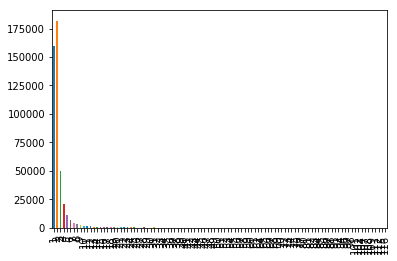

In [65]:
tmp1['dura'].value_counts().sort_index().plot(kind='bar')

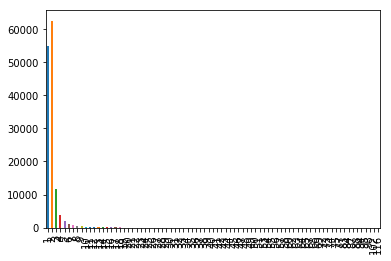

In [66]:
tmp2['dura'].value_counts().sort_index().plot(kind='bar')

In [67]:
tmp1 = train2[train2['uid'] < 4100]
tmp2 = train2[train2['uid'] >= 4100]
tmp3 = train2[train2['uid'] < 2000]

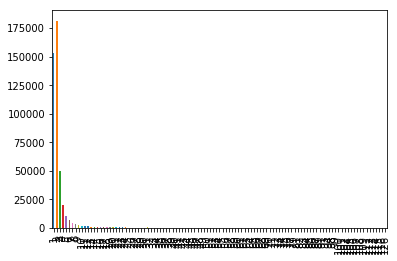

In [68]:
tmp1['dura'].value_counts().sort_index().plot(kind='bar')

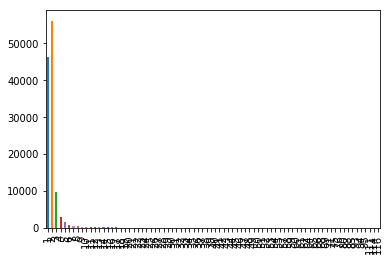

In [69]:
tmp2['dura'].value_counts().sort_index().plot(kind='bar')

In [70]:
tmp1['dura'].describe()

count    440968.000000
mean          2.503420
std           3.305711
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         126.000000
Name: dura, dtype: float64

In [71]:
tmp2['dura'].describe()

count    119559.000000
mean          2.029885
std           2.397622
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         116.000000
Name: dura, dtype: float64

In [72]:
tmp3['dura'].describe()

count    215825.000000
mean          2.481066
std           3.297103
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max         116.000000
Name: dura, dtype: float64

In [73]:
tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

In [76]:
tt1 = tmp1['call_type'].value_counts()
tt2 = tmp2['call_type'].value_counts()
print(tt1)
print(tt2)

1    358754
3     57417
2     34176
5       110
4        30
Name: call_type, dtype: int64
1    124206
3     11389
2      4156
5        13
Name: call_type, dtype: int64


In [87]:
tt1 = tmp1.groupby('uid').dura.sum()
tt2 = tmp2.groupby('uid').dura.sum()
tt3 = tmp3.groupby('uid').dura.sum()

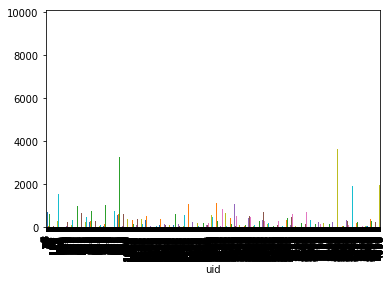

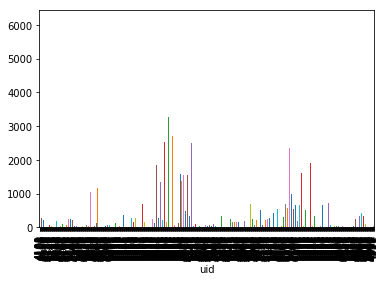

In [83]:
tt1.plot(kind='bar')
plt.show()
tt2.plot(kind='bar')
plt.show()

In [84]:
tt1.describe()

count    3946.000000
mean      287.979219
std       472.291671
min         1.000000
25%        40.250000
50%       140.000000
75%       336.000000
max      9609.000000
Name: dura, dtype: float64

In [85]:
tt2.describe()

count     833.000000
mean      356.933974
std       634.702555
min         1.000000
25%        16.000000
50%        83.000000
75%       362.000000
max      6133.000000
Name: dura, dtype: float64

In [88]:
tt3.describe()

count    1923.000000
mean      275.036921
std       379.549462
min         1.000000
25%        43.000000
50%       142.000000
75%       334.000000
max      3255.000000
Name: dura, dtype: float64

In [89]:
tt = train1.groupby('uid').dura.sum()
dict = tt.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [90]:
print(ans)

1        103.0
2          3.0
3         30.0
4        625.0
5        288.0
6         13.0
7         91.0
8        332.0
9        179.0
10       383.0
11       305.0
12       489.0
13         NaN
14       249.0
15         2.0
16       394.0
17       245.0
18       146.0
19       959.0
20       232.0
21         6.0
22        12.0
23        18.0
24       695.0
25       900.0
26      1540.0
27      2366.0
28       390.0
29        15.0
30        78.0
         ...  
4970     530.0
4971     356.0
4972     350.0
4973     561.0
4974     220.0
4975     222.0
4976     257.0
4977      94.0
4978      93.0
4979      17.0
4980       6.0
4981       8.0
4982      25.0
4983      37.0
4984       6.0
4985      28.0
4986       NaN
4987      16.0
4988       4.0
4989     196.0
4990     747.0
4991      78.0
4992     659.0
4993      16.0
4994      38.0
4995      25.0
4996      69.0
4997      83.0
4998      57.0
4999      24.0
Length: 4999, dtype: float64


In [93]:
ans = ans.fillna(0)
ans = ans.astype('int64')

In [94]:
ans.to_csv('../data/train/train_feature_12.csv', index=True)

In [95]:
tmp1 = train2[train2['uid'] < 4100]
tmp2 = train2[train2['uid'] >= 4100]
tmp3 = train2[train2['uid'] < 2000]

In [96]:
tt1 = tmp1.groupby('uid').dura.sum()
tt2 = tmp2.groupby('uid').dura.sum()
tt3 = tmp3.groupby('uid').dura.sum()

In [99]:
tt1.describe()

count    3963.000000
mean      278.558668
std       396.938348
min         1.000000
25%        44.000000
50%       141.000000
75%       353.000000
max      6264.000000
Name: dura, dtype: float64

In [100]:
tt2.describe()

count     807.000000
mean      300.732342
std       571.072043
min         1.000000
25%        12.000000
50%        57.000000
75%       243.000000
max      3772.000000
Name: dura, dtype: float64

In [101]:
tt3.describe()

count    1926.000000
mean      278.024922
std       377.447722
min         1.000000
25%        46.000000
50%       144.500000
75%       358.000000
max      3969.000000
Name: dura, dtype: float64

In [102]:
tt = train2.groupby('uid').dura.sum()
dict = tt.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [103]:
ans = ans.fillna(0)
ans = ans.astype('int64')

In [104]:
ans.to_csv('../data/train/train_feature_13.csv', index=True)

统计：主叫次数 / 被叫次数

In [71]:
train1 = train_voice_df[train_voice_df['in_out'] == 0]
train2 = train_voice_df[train_voice_df['in_out'] == 1]

tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

In [72]:
t1 = train1['uid'].value_counts()
t2 = train2['uid'].value_counts()
dict = t1.to_dict()
tt1 = pd.Series(index = range(1, 5000), data = dict)
tt1 = tt1.fillna(0)
dict = t2.to_dict()
tt2 = pd.Series(index = range(1, 5000), data = dict)
tt2 = tt2.fillna(0)
tt3 = tt1 / (tt1 + tt2)

In [73]:
print(tt3)

1       0.417722
2       1.000000
3       0.333333
4       0.523622
5       0.441397
6       0.181818
7       0.366337
8       0.576923
9       0.375000
10      0.484615
11      0.585903
12      0.407285
13      0.000000
14      0.456954
15      0.024691
16      0.432990
17      0.534884
18      0.325843
19      0.618238
20      0.355556
21      0.157895
22      0.227273
23      0.156250
24      0.388974
25      0.484094
26      0.531670
27      0.522250
28      0.411765
29      0.692308
30      0.483871
          ...   
4970    0.493976
4971    0.711191
4972    0.416667
4973    0.684536
4974    0.694444
4975    0.444444
4976    0.561069
4977    0.776316
4978    0.536082
4979    1.000000
4980    1.000000
4981    1.000000
4982    0.342857
4983    0.833333
4984    1.000000
4985    0.666667
4986    0.000000
4987    1.000000
4988    1.000000
4989    0.666667
4990    0.793210
4991    0.150000
4992    0.581749
4993    0.636364
4994    0.560000
4995    0.277778
4996    0.966667
4997    0.5555

In [74]:
aa1 = tt3[tt3.index < 4100]
aa2 = tt3[tt3.index >= 4100]
aa3 = tt3[tt3.index < 2000]

In [75]:
aa1.describe()

count    4090.000000
mean        0.481722
std         0.213816
min         0.000000
25%         0.361764
50%         0.482102
75%         0.600000
max         1.000000
dtype: float64

In [76]:
aa2.describe()

count    897.000000
mean       0.559358
std        0.270759
min        0.000000
25%        0.405339
50%        0.559322
75%        0.743363
max        1.000000
dtype: float64

In [77]:
aa3.describe()

count    1993.000000
mean        0.481583
std         0.213506
min         0.000000
25%         0.365385
50%         0.479021
75%         0.597015
max         1.000000
dtype: float64

In [78]:
print(tt3[tt3.index == 354])

354   NaN
dtype: float64


In [80]:
tt3 = tt3.fillna(0.5)

In [81]:
tt3.to_csv('../data/train/train_feature_14.csv', index=True)

In [38]:
train1 = train_voice_df[train_voice_df['in_out'] == 0]
train2 = train_voice_df[train_voice_df['in_out'] == 1]

tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

In [49]:
group = train1.groupby('uid')['opp_num']
agg = group.aggregate({'opp_num': lambda x: x.nunique()})

d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [50]:
print(agg)

      opp_num
uid          
1          12
2           2
3           1
4          39
5          37
6           7
7          25
8          36
9          17
10         29
11         33
12         46
14         34
15          1
16         39
17          7
18         14
19         93
20         23
21          2
22          2
23          3
24         41
25        122
26         41
27        154
28         24
29          8
30         19
31         17
...       ...
4969       85
4970       68
4971       98
4972       81
4973      114
4974       62
4975       61
4976       56
4977       18
4978       10
4979        2
4980        2
4981        1
4982        6
4983        9
4984        2
4985        2
4987        1
4988        1
4989       21
4990       81
4991        3
4992       65
4993        5
4994        4
4995        1
4996        9
4997       10
4998        8
4999        5

[4779 rows x 1 columns]


In [51]:
agg.rename(columns=lambda x:x.replace('opp_num','opp_cnt'), inplace=True)

In [52]:
print(agg)

      opp_cnt
uid          
1          12
2           2
3           1
4          39
5          37
6           7
7          25
8          36
9          17
10         29
11         33
12         46
14         34
15          1
16         39
17          7
18         14
19         93
20         23
21          2
22          2
23          3
24         41
25        122
26         41
27        154
28         24
29          8
30         19
31         17
...       ...
4969       85
4970       68
4971       98
4972       81
4973      114
4974       62
4975       61
4976       56
4977       18
4978       10
4979        2
4980        2
4981        1
4982        6
4983        9
4984        2
4985        2
4987        1
4988        1
4989       21
4990       81
4991        3
4992       65
4993        5
4994        4
4995        1
4996        9
4997       10
4998        8
4999        5

[4779 rows x 1 columns]


In [56]:
tt1 = agg[agg.index < 4100]
tt2 = agg[agg.index >= 4100]
tt3 = agg[agg.index < 2000]

In [57]:
tt1.describe()

,opp_cnt
count,3946.000000
mean,33.360872
std,157.866392
min,1.000000
25%,6.000000
50%,15.000000
75%,31.000000
max,7920.000000


In [58]:
tt2.describe()

,opp_cnt
count,833.000000
mean,46.110444
std,179.116454
min,1.000000
25%,3.000000
50%,11.000000
75%,45.000000
max,4615.000000


In [59]:
tt3.describe()

,opp_cnt
count,1923.000000
mean,29.978679
std,67.628361
min,1.000000
25%,6.500000
50%,15.000000
75%,32.000000
max,1983.000000


In [66]:
dict = pd.Series(agg['opp_cnt']).to_dict()
tmp = pd.Series(index = range(1, 5000), data = dict)
print(tmp)

1        12.0
2         2.0
3         1.0
4        39.0
5        37.0
6         7.0
7        25.0
8        36.0
9        17.0
10       29.0
11       33.0
12       46.0
13        NaN
14       34.0
15        1.0
16       39.0
17        7.0
18       14.0
19       93.0
20       23.0
21        2.0
22        2.0
23        3.0
24       41.0
25      122.0
26       41.0
27      154.0
28       24.0
29        8.0
30       19.0
        ...  
4970     68.0
4971     98.0
4972     81.0
4973    114.0
4974     62.0
4975     61.0
4976     56.0
4977     18.0
4978     10.0
4979      2.0
4980      2.0
4981      1.0
4982      6.0
4983      9.0
4984      2.0
4985      2.0
4986      NaN
4987      1.0
4988      1.0
4989     21.0
4990     81.0
4991      3.0
4992     65.0
4993      5.0
4994      4.0
4995      1.0
4996      9.0
4997     10.0
4998      8.0
4999      5.0
Length: 4999, dtype: float64


In [67]:
tmp = tmp.fillna(0)
tmp = tmp.astype('int64')

In [68]:
print(tmp)

1        12
2         2
3         1
4        39
5        37
6         7
7        25
8        36
9        17
10       29
11       33
12       46
13        0
14       34
15        1
16       39
17        7
18       14
19       93
20       23
21        2
22        2
23        3
24       41
25      122
26       41
27      154
28       24
29        8
30       19
       ... 
4970     68
4971     98
4972     81
4973    114
4974     62
4975     61
4976     56
4977     18
4978     10
4979      2
4980      2
4981      1
4982      6
4983      9
4984      2
4985      2
4986      0
4987      1
4988      1
4989     21
4990     81
4991      3
4992     65
4993      5
4994      4
4995      1
4996      9
4997     10
4998      8
4999      5
Length: 4999, dtype: int64


In [70]:
tmp.to_csv('../data/train/train_feature_15.csv', index=True)

In [9]:
train1 = train_voice_df[train_voice_df['in_out'] == 0]
train2 = train_voice_df[train_voice_df['in_out'] == 1]

tmp1 = train1[train1['uid'] < 4100]
tmp2 = train1[train1['uid'] >= 4100]
tmp3 = train1[train1['uid'] < 2000]

In [10]:
group = train1.groupby('uid')['dura']
agg = group.mean()
print(agg)

uid
1       128.181818
2        30.500000
3       200.428571
4       222.894737
5        44.864407
6        49.625000
7        86.297297
8        90.177778
9       233.138889
10      310.412698
11       77.676692
12      174.666667
14      156.188406
15       21.000000
16      129.666667
17      581.826087
18       88.637931
19       84.025000
20       67.473214
21       40.666667
22       90.400000
23      154.200000
24      107.271654
25       93.928571
26      275.696751
27      108.815385
28      117.120301
29       52.666667
30       93.666667
31       33.081633
           ...    
4969     43.249110
4970     95.624390
4971     49.913706
4972     48.676923
4973     43.346386
4974     49.568000
4975     47.390625
4976     46.585034
4977     38.576271
4978     48.442308
4979     77.250000
4980     64.000000
4981     92.000000
4982     61.000000
4983     35.600000
4984     22.750000
4985    759.500000
4987    139.600000
4988    166.000000
4989    135.387097
4990    115.778210
4991    

In [11]:
tt1 = agg[agg.index < 4100]
tt2 = agg[agg.index >= 4100]

In [12]:
tt1.describe()

count    3946.000000
mean      111.031884
std       109.588973
min         3.000000
25%        55.152597
50%        81.802795
75%       126.961538
max      2234.000000
Name: dura, dtype: float64

In [13]:
tt2.describe()

count     833.000000
mean      102.694668
std       114.569179
min         3.000000
25%        45.481707
50%        71.600000
75%       115.000000
max      1153.750000
Name: dura, dtype: float64

In [14]:
dict = agg.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [15]:
ans = ans.fillna(0)
ans = ans.astype('int64')

In [16]:
ans.to_csv('../data/train/train_feature_16.csv', index=True)

In [100]:
g = train1[train1['dura'] <= 10]
tmp1 = g[g['uid'] < 4100]
tmp2 = g[g['uid'] >= 4100]
tmp3 = g[g['uid'] < 2000]

In [101]:
print(tmp1)

          uid                           opp_num opp_head  opp_len  start_time  \
84        689  80274E44D8F1F1A7935577F04071ECF1      139       11    26070136   
107      2313  D3F0EDF30B5A2D1D87BA9969F6222593      151       11    26155947   
242      2312  045FA7346A37BE384AD0DEF54443F080      158       11    26150209   
243      2312  D8EF674C4B4156E4DCBFB0B277D6D948      138       11    26150720   
291      3016  2DC26F1CAD587305336E9C1158484871      150       11    26111325   
311      1750  92732999C625678CEEE73FAE853EC99C      131       11    26150704   
320      1283  F33261939776F9F37433BD69F88C5C17      130       11    26175702   
328      1283  EA7DA49E2161130D1053BC38425C6374      130       11    26164500   
329      1283  EA7DA49E2161130D1053BC38425C6374      130       11    26161756   
342      1976  014BB799170497735F3012C1D4FCC45D      133       11    26082126   
363      2410  32052E021D986D2E4516A8E9CC3AE9ED      173       11    26092431   
381      3145  1095EEE66E764

In [103]:
ww1 = tmp1['uid'].value_counts()
ww2 = tmp2['uid'].value_counts()
ww3 = tmp3['uid'].value_counts()

In [104]:
ww1.describe()

count    2813.000000
mean        9.948809
std        72.101430
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max      3433.000000
Name: uid, dtype: float64

In [105]:
ww2.describe()

count     513.000000
mean       16.842105
std        50.512533
min         1.000000
25%         2.000000
50%         4.000000
75%        17.000000
max      1005.000000
Name: uid, dtype: float64

In [106]:
ww3.describe()

count    1389.000000
mean        8.125270
std        20.743219
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       494.000000
Name: uid, dtype: float64

In [108]:
ans = g['uid'].value_counts()

In [109]:
dict = ans.to_dict()
ans2 = pd.Series(index = range(1, 5000), data = dict)

In [110]:
ans2 = ans2.fillna(0)
ans2 = ans2.astype('int64')

In [111]:
print(ans2)

1        7
2        0
3        0
4        8
5        4
6        0
7        3
8        2
9        0
10       3
11       5
12       6
13       0
14       1
15       1
16       4
17       0
18       8
19      33
20       8
21       0
22       0
23       1
24       8
25      10
26       4
27      21
28       1
29       0
30       2
        ..
4970    16
4971     4
4972     7
4973    12
4974     8
4975     6
4976    13
4977     8
4978     4
4979     0
4980     0
4981     0
4982     0
4983     2
4984     0
4985     0
4986     0
4987     0
4988     0
4989     3
4990    10
4991     1
4992     5
4993     1
4994     0
4995     0
4996     1
4997     1
4998     0
4999     0
Length: 4999, dtype: int64


In [114]:
ans2.to_csv('../data/train/train_feature_17.csv', index=True)

In [194]:
g = train1[train1['opp_len'] <= 8]

In [195]:
tmp = g['uid'].value_counts()

In [196]:
tmp1 = tmp[tmp.index < 4100]
tmp2 = tmp[tmp.index >= 4100]
tmp3 = tmp[tmp.index < 2000]

In [197]:
# tmp1.plot(kind='bar')

In [198]:
# tmp2.plot(kind='bar')

In [199]:
tmp1.describe()

count    2060.000000
mean        5.384951
std         8.433200
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       144.000000
Name: uid, dtype: float64

In [200]:
tmp2.describe()

count    419.000000
mean       4.386635
std        5.679512
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       54.000000
Name: uid, dtype: float64

In [201]:
tmp3.describe()

count    1002.000000
mean        5.575848
std         8.528892
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       144.000000
Name: uid, dtype: float64

In [203]:
tmp = tmp.sort_index()

In [204]:
print(tmp)

1        2
4       10
5        3
8       21
10       4
11       3
12       2
14       2
16       3
18       4
19      40
20      10
24       2
25       2
27      11
28       2
30       3
31       1
32      11
33       1
34       4
35       2
37       2
40      21
41       2
42       3
43      11
44       2
45      17
46       1
        ..
4925     1
4928     3
4929     1
4932     7
4939     1
4946     2
4951     4
4952     3
4953     1
4955     6
4956     2
4957     1
4959     1
4960     1
4961     1
4964     2
4967     1
4968     1
4970     4
4972     3
4973     3
4974     1
4975     2
4977    18
4979     6
4980     2
4981     3
4996     2
4997     1
4999     2
Name: uid, Length: 2479, dtype: int64


In [205]:
dict = tmp.to_dict()
ans = pd.Series(index = range(1, 5000), data = dict)

In [206]:
ans = ans.fillna(0)

In [207]:
ans = ans.astype('int64')

In [208]:
print(ans)

1        2
2        0
3        0
4       10
5        3
6        0
7        0
8       21
9        0
10       4
11       3
12       2
13       0
14       2
15       0
16       3
17       0
18       4
19      40
20      10
21       0
22       0
23       0
24       2
25       2
26       0
27      11
28       2
29       0
30       3
        ..
4970     4
4971     0
4972     3
4973     3
4974     1
4975     2
4976     0
4977    18
4978     0
4979     6
4980     2
4981     3
4982     0
4983     0
4984     0
4985     0
4986     0
4987     0
4988     0
4989     0
4990     0
4991     0
4992     0
4993     0
4994     0
4995     0
4996     2
4997     1
4998     0
4999     2
Length: 4999, dtype: int64


In [209]:
ans.to_csv('../data/train/train_feature_18.csv', index=True)

In [214]:
def do(x):
    return int(x['start_time'] / 1000000)
tmp = train_voice_df
train_voice_df.loc[:, 'day'] = tmp.apply(do, axis = 1)

          uid  day
0         113   26
1         113   26
2         113   26
3         113   26
4        3340   26
5        3340   26
6        3340   26
7        3340   26
8        2016   26
9        2016   26
10       2016   26
11       2016   26
12       2016   26
13       2016   26
14        493   26
15        493   26
16        493   26
17       2255   26
18       2255   26
19       2255   26
20       2255   26
21       2255   26
22       2255   26
23       2255   26
24       2255   26
25       1362   26
26       1362   26
27       1362   26
28       1362   26
29       1362   26
...       ...  ...
1150748  1809   33
1150749  1809   33
1150750  3891   33
1150751  3891   33
1150752   593   33
1150753   593   33
1150754  2043   24
1150755  2043   24
1150756  2043   24
1150757  2043   24
1150758  2043   24
1150759   907   24
1150760   907   24
1150761   907   24
1150762   907   24
1150763   907   24
1150764  1785   24
1150765  1785   24
1150766  1785   24
1150767  1785   24
1150768  178

In [215]:
print(train_voice_df[['uid', 'start_time', 'day']])

          uid  start_time  day
0         113    26115956   26
1         113    26115623   26
2         113    26174233   26
3         113    26070423   26
4        3340    26201745   26
5        3340    26060320   26
6        3340    26061046   26
7        3340    26192655   26
8        2016    26112314   26
9        2016    26112217   26
10       2016    26094342   26
11       2016    26104032   26
12       2016    26182944   26
13       2016    26131919   26
14        493    26155722   26
15        493    26101621   26
16        493    26144615   26
17       2255    26110736   26
18       2255    26112324   26
19       2255    26110859   26
20       2255    26181453   26
21       2255    26115250   26
22       2255    26071131   26
23       2255    26063525   26
24       2255    26080751   26
25       1362    26084126   26
26       1362    26082818   26
27       1362    26172626   26
28       1362    26180602   26
29       1362    26110348   26
...       ...         ...  ...
1150748 

In [217]:
train1 = train_voice_df[train_voice_df['in_out'] == 0]
train2 = train_voice_df[train_voice_df['in_out'] == 1]

In [225]:
group = train1.groupby('uid')
item_dict = {}
for index,g in group:
    tmp = g['day'].value_counts()
    item_dict[index] = tmp.std()

In [230]:
ans = pd.Series(index = range(1, 5000), data = item_dict)

In [231]:
print(ans)

1        0.859125
2        0.000000
3        0.000000
4        2.962200
5        2.474610
6        0.000000
7        1.392088
8        1.913686
9        1.005249
10       2.060234
11       3.931771
12       2.174335
13            NaN
14       3.602849
15            NaN
16       2.651115
17       0.418854
18       1.406132
19       5.830227
20       1.975901
21       0.000000
22            NaN
23       0.000000
24       3.333157
25       5.230776
26       4.190685
27       9.428894
28       2.713262
29       0.487950
30       1.702186
          ...    
4970     6.309479
4971     6.384468
4972     7.549834
4973    12.916582
4974     7.403345
4975     7.230886
4976     6.872348
4977     2.768015
4978     2.561020
4979     1.154701
4980     0.707107
4981          NaN
4982     0.632456
4983     1.618080
4984     0.577350
4985          NaN
4986          NaN
4987     0.577350
4988          NaN
4989     7.537209
4990    15.394186
4991     4.949747
4992     4.638349
4993     0.408248
4994     1

In [232]:
ans = ans.fillna(0)

In [234]:
ans.to_csv('../data/train/train_feature_19.csv', index=True)

In [235]:
tt1 = ans[ans.index < 4100]
tt2 = ans[ans.index >= 4100]
tt3 = ans[ans.index < 2000]

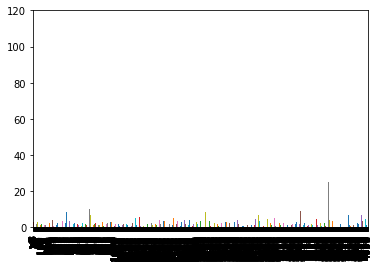

In [236]:
tt1.plot(kind='bar')

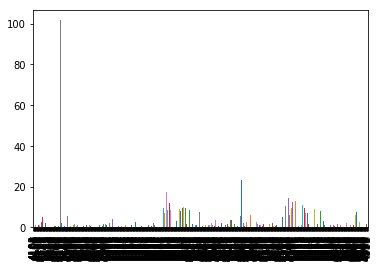

In [237]:
tt2.plot(kind='bar')

# Feature 34

In [5]:
voice_opp_num = train_voice_df.groupby(['uid'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('voice_opp_num_')

d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [6]:
print(voice_opp_num)

      voice_opp_num_count  voice_opp_num_unique_count
uid                                                  
1                      79                          22
2                       2                           2
3                      21                          15
4                     254                          77
5                     401                          55
6                      44                          21
7                     101                          60
8                     234                          71
9                      96                          21
10                    130                          37
11                    227                          41
12                    302                         123
13                      2                           2
14                    151                          48
15                     81                          48
16                    291                          92
17                     43   

# Feature 35

In [7]:
voice_opp_head=train_voice_df.groupby(['uid'])['opp_head'].agg({'unique_count': lambda x: len(pd.unique(x))}).add_prefix('voice_opp_head_')

d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [8]:
print(voice_opp_head)

      voice_opp_head_unique_count
uid                              
1                              17
2                               1
3                              10
4                              31
5                              28
6                              15
7                              33
8                              30
9                              21
10                             31
11                             19
12                             38
13                              2
14                             21
15                             32
16                             28
17                             11
18                             17
19                             38
20                             22
21                              6
22                              6
23                              5
24                             37
25                             35
26                             21
27                             44
28            

# Feature 36

In [9]:
voice_opp_len=train_voice_df.groupby(['uid','opp_len'])['uid'].count().unstack().add_prefix('voice_opp_len_').fillna(0)

In [10]:
voice_opp_len.columns.name = None

In [52]:
'''
ori = voice_opp_len
for i in range(0, ori.columns.size):
    # print(len(pd.unique(ori.iloc[:, i])))
    if len(pd.unique(ori.iloc[:, i])) < 30:
        voice_opp_len = voice_opp_len.drop(columns = ori.columns[i], axis=1)
'''

In [11]:
print(voice_opp_len)

      voice_opp_len_3  voice_opp_len_5  voice_opp_len_6  voice_opp_len_7  \
uid                                                                        
1                 0.0              3.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              1.0              0.0              0.0   
4                 0.0              1.0              0.0              0.0   
5                 0.0              4.0              0.0              0.0   
6                 0.0              0.0              0.0              0.0   
7                 0.0              0.0              0.0              0.0   
8                 0.0              3.0              0.0              0.0   
9                 0.0              0.0              0.0              0.0   
10                0.0              1.0              0.0              2.0   
11                0.0              2.0              0.0              0.0   
12          

# Feature 37

In [12]:
voice_call_type = train_voice_df.groupby(['uid','call_type'])['uid'].count().unstack().add_prefix('voice_call_type_').fillna(0)

In [13]:
voice_call_type.columns.name = None

In [14]:
print(voice_call_type)

      voice_call_type_1  voice_call_type_2  voice_call_type_3  \
uid                                                             
1                  79.0                0.0                0.0   
2                   2.0                0.0                0.0   
3                  21.0                0.0                0.0   
4                 218.0                6.0               30.0   
5                 398.0                0.0                3.0   
6                  39.0                5.0                0.0   
7                  98.0                1.0                2.0   
8                 234.0                0.0                0.0   
9                  81.0                1.0               14.0   
10                121.0                0.0                9.0   
11                226.0                1.0                0.0   
12                247.0               15.0               40.0   
13                  2.0                0.0                0.0   
14                133.0  

# Feature 38

In [15]:
voice_in_out = train_voice_df.groupby(['uid','in_out'])['uid'].count().unstack().add_prefix('voice_in_out_').fillna(0)

In [16]:
voice_in_out.columns.name = None

In [17]:
print(voice_in_out)

      voice_in_out_0  voice_in_out_1
uid                                 
1               33.0            46.0
2                2.0             0.0
3                7.0            14.0
4              133.0           121.0
5              177.0           224.0
6                8.0            36.0
7               37.0            64.0
8              135.0            99.0
9               36.0            60.0
10              63.0            67.0
11             133.0            94.0
12             123.0           179.0
13               0.0             2.0
14              69.0            82.0
15               2.0            79.0
16             126.0           165.0
17              23.0            20.0
18              58.0           120.0
19             400.0           247.0
20             112.0           203.0
21               3.0            16.0
22               5.0            17.0
23               5.0            27.0
24             254.0           399.0
25             350.0           373.0
2

# Feature 39

In [18]:
train_1 = train_voice_df[train_voice_df['in_out'] == 0]
train_2 = train_voice_df[train_voice_df['in_out'] == 1]

In [20]:
t1 = train_1['uid'].value_counts()
t2 = train_2['uid'].value_counts()
dict = t1.to_dict()
tt1 = pd.Series(index = range(1, 5000), data = dict)
tt1 = tt1.fillna(0)
dict = t2.to_dict()
tt2 = pd.Series(index = range(1, 5000), data = dict)
tt2 = tt2.fillna(0)
tt3 = tt1 / (tt1 + tt2)

In [21]:
print(tt3)

1       0.417722
2       1.000000
3       0.333333
4       0.523622
5       0.441397
6       0.181818
7       0.366337
8       0.576923
9       0.375000
10      0.484615
11      0.585903
12      0.407285
13      0.000000
14      0.456954
15      0.024691
16      0.432990
17      0.534884
18      0.325843
19      0.618238
20      0.355556
21      0.157895
22      0.227273
23      0.156250
24      0.388974
25      0.484094
26      0.531670
27      0.522250
28      0.411765
29      0.692308
30      0.483871
          ...   
4970    0.493976
4971    0.711191
4972    0.416667
4973    0.684536
4974    0.694444
4975    0.444444
4976    0.561069
4977    0.776316
4978    0.536082
4979    1.000000
4980    1.000000
4981    1.000000
4982    0.342857
4983    0.833333
4984    1.000000
4985    0.666667
4986    0.000000
4987    1.000000
4988    1.000000
4989    0.666667
4990    0.793210
4991    0.150000
4992    0.581749
4993    0.636364
4994    0.560000
4995    0.277778
4996    0.966667
4997    0.5555

In [22]:
tt3 = tt3.fillna(0.5)

In [23]:
voice_in_out_rate = pd.DataFrame(tt3)
voice_in_out_rate.columns = ['in_out_rate']

In [24]:
print(voice_in_out_rate)

      in_out_rate
1        0.417722
2        1.000000
3        0.333333
4        0.523622
5        0.441397
6        0.181818
7        0.366337
8        0.576923
9        0.375000
10       0.484615
11       0.585903
12       0.407285
13       0.000000
14       0.456954
15       0.024691
16       0.432990
17       0.534884
18       0.325843
19       0.618238
20       0.355556
21       0.157895
22       0.227273
23       0.156250
24       0.388974
25       0.484094
26       0.531670
27       0.522250
28       0.411765
29       0.692308
30       0.483871
...           ...
4970     0.493976
4971     0.711191
4972     0.416667
4973     0.684536
4974     0.694444
4975     0.444444
4976     0.561069
4977     0.776316
4978     0.536082
4979     1.000000
4980     1.000000
4981     1.000000
4982     0.342857
4983     0.833333
4984     1.000000
4985     0.666667
4986     0.000000
4987     1.000000
4988     1.000000
4989     0.666667
4990     0.793210
4991     0.150000
4992     0.581749
4993     0

# Feature 40

In [25]:
def do(x):
    start_day = int(x['start_time'] % 100000000 / 1000000)
    start_hour = int(x['start_time'] % 1000000 / 10000)
    start_min = int(x['start_time'] % 10000 / 100)
    start_sec = int(x['start_time'] % 100)
    start = (start_day * 24 * 60 + start_hour * 60 + start_min) * 60 + start_sec
    
    end_day = int(x['end_time'] % 100000000 / 1000000)
    end_hour = int(x['end_time'] % 1000000 / 10000)
    end_min = int(x['end_time'] % 10000 / 100)
    end_sec = int(x['end_time'] % 100)
    end = (end_day * 24 * 60 + end_hour * 60 + end_min) * 60 + end_sec
    
    # duration in seconds
    return end - start + 1
tmp = train_voice_df
train_voice_df.loc[:, 'dura_second'] = tmp.apply(do, axis = 1)

In [26]:
train_1 = train_voice_df[train_voice_df['in_out'] == 0]
train_2 = train_voice_df[train_voice_df['in_out'] == 1]

In [27]:
g = train_1[train_1['dura_second'] <= 10]

In [28]:
cnt = g['uid'].value_counts().sort_index()

In [29]:
cnt.index.name = 'uid'
voice_short_dura_count = pd.DataFrame(cnt)
voice_short_dura_count.columns = ['voice_short_dura_count']

In [30]:
print(voice_short_dura_count)

      voice_short_dura_count
uid                         
1                          7
4                          8
5                          4
7                          3
8                          2
10                         3
11                         5
12                         6
14                         1
15                         1
16                         4
18                         8
19                        33
20                         8
23                         1
24                         8
25                        10
26                         4
27                        21
28                         1
30                         2
31                        21
32                        11
33                         5
34                        45
35                         1
37                         1
40                         9
41                         4
42                         3
...                      ...
4951                      10
4952          

# Feature 41

In [31]:
def do(x):
    return int(x['start_time'] / 1000000)
tmp = train_voice_df
train_voice_df.loc[:, 'date'] = tmp.apply(do, axis = 1)

In [32]:
print(train_voice_df[['uid', 'start_time', 'date']])

          uid  start_time  date
0         113    26115956    26
1         113    26115623    26
2         113    26174233    26
3         113    26070423    26
4        3340    26201745    26
5        3340    26060320    26
6        3340    26061046    26
7        3340    26192655    26
8        2016    26112314    26
9        2016    26112217    26
10       2016    26094342    26
11       2016    26104032    26
12       2016    26182944    26
13       2016    26131919    26
14        493    26155722    26
15        493    26101621    26
16        493    26144615    26
17       2255    26110736    26
18       2255    26112324    26
19       2255    26110859    26
20       2255    26181453    26
21       2255    26115250    26
22       2255    26071131    26
23       2255    26063525    26
24       2255    26080751    26
25       1362    26084126    26
26       1362    26082818    26
27       1362    26172626    26
28       1362    26180602    26
29       1362    26110348    26
...     

In [33]:
voice_date = train_voice_df.groupby(['uid','date'])['uid'].count().unstack().add_prefix('date_').fillna(0)

In [34]:
print(voice_date)

date  date_0  date_1  date_2  date_3  date_4  date_5  date_6  date_7  date_8  \
uid                                                                            
1        0.0     0.0     1.0     1.0     1.0     1.0     0.0     1.0     7.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     5.0     1.0     9.0     6.0     6.0     2.0     2.0     5.0   
5        0.0     8.0     3.0     7.0     3.0     9.0     6.0    10.0    12.0   
6        0.0     3.0     4.0     1.0     2.0     1.0     0.0     0.0     1.0   
7        0.0     1.0     0.0     0.0     6.0     1.0     1.0     2.0     6.0   
8        0.0     5.0     6.0     6.0     3.0     0.0    11.0     5.0     5.0   
9        0.0     5.0     0.0    11.0     4.0     2.0     1.0     6.0     3.0   
10       0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11       0.0     0.0     1.0     5.0    

# Merge Feature 34 to 41

In [35]:
agg = voice_opp_num
agg = agg.join(voice_opp_len)
agg = agg.join(voice_opp_head)
agg = agg.join(voice_call_type)
agg = agg.join(voice_in_out)
agg = agg.join(voice_in_out_rate)
agg = agg.join(voice_short_dura_count)
agg = agg.join(voice_date)

In [38]:
agg = agg.drop('voice_call_type_4', axis = 1)

In [40]:
agg = agg.drop(u'date_0', axis = 1)

In [42]:
print(agg)

      voice_opp_num_count  voice_opp_num_unique_count  voice_opp_len_3  \
uid                                                                      
1                      79                          22              0.0   
2                       2                           2              0.0   
3                      21                          15              0.0   
4                     254                          77              0.0   
5                     401                          55              0.0   
6                      44                          21              0.0   
7                     101                          60              0.0   
8                     234                          71              0.0   
9                      96                          21              0.0   
10                    130                          37              0.0   
11                    227                          41              0.0   
12                    302             

In [43]:
dict = agg.to_dict()
agg2 = pd.DataFrame(index = range(1, 5000), data = dict)

In [44]:
agg2 = agg2.fillna(0)
agg2 = agg2.astype('int64')

In [46]:
agg2.to_csv('../data/train/train_feature_34to41.csv', index=True, header=None)